### Generating a simple network randomly from a distribution

In [8]:
adj_matrix = matrix(rbinom(n = 100, prob = .4, size = 1), nrow = 10, ncol = 10)

In [9]:
diag(adj_matrix) = 0

In [10]:
adj_matrix

0,1,1,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,1,1
1,0,0,0,0,1,1,0,0,1
1,0,0,0,0,0,0,0,0,1
0,0,0,1,0,0,0,0,0,1
1,1,1,1,0,1,0,1,0,1
0,1,1,1,1,1,0,0,1,0
1,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,1,0,1,0


In [18]:
adj_matrix[, 1]

[1] 0 1 1 1 1 0 1 0 1 1

In [23]:
rowSums(adj_matrix)

[1] 3 3 5 4 2 2 7 6 3 3

In [24]:
library(network)

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.




In [29]:
net = as.network(adj_matrix, directed = T)

In [30]:
net

 Network attributes:
  vertices = 10 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 38 
    missing edges= 0 
    non-missing edges= 38 

 Vertex attribute names: 
    vertex.names 

No edge attributes

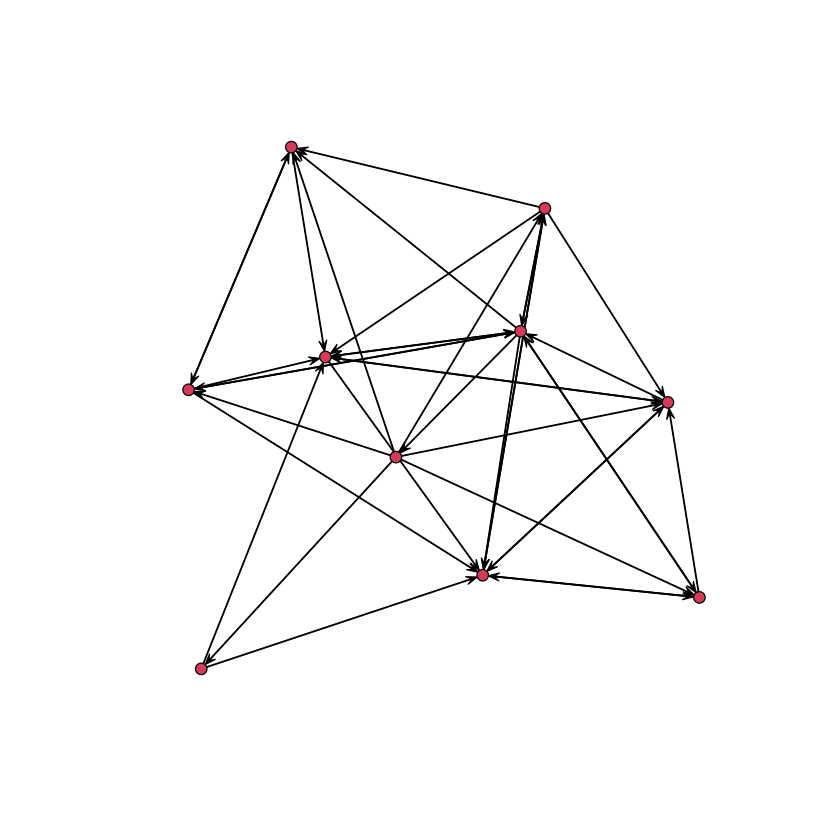

In [31]:
par(bg = 'white')
plot(net)

### Doing some statistical tests on networks

In [32]:
library(sna)

Loading required package: statnet.common


Attaching package: 'statnet.common'


The following object is masked from 'package:base':

    order


sna: Tools for Social Network Analysis
Version 2.6 created on 2020-10-5.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




In [35]:
data(coleman)

In [48]:
colenet = as.network(coleman[1, , ])

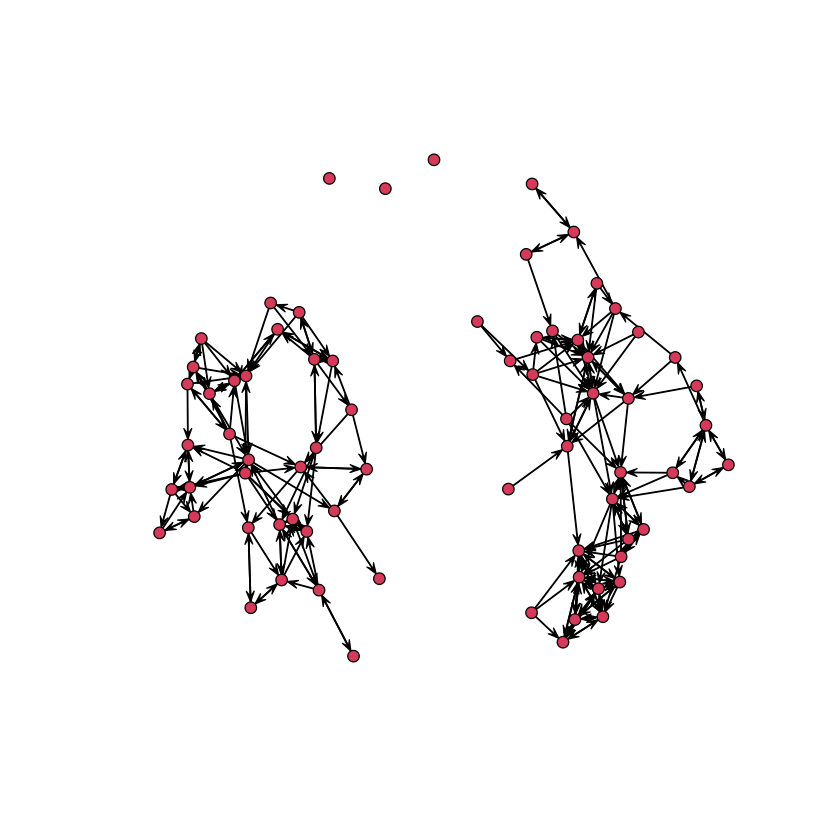

In [50]:
par(bg = 'white')
plot(colenet)

In [52]:
dyad.census(colenet)

Mut,Asym,Null
62,119,2447


In [53]:
triad.census(colenet)

003,012,102,021D,021U,021C,111D,111U,030T,030C,201,120D,120U,120C,210,300
50171,7384,3957,64,121,128,139,70,23,1,20,43,10,9,34,22


In [83]:
obs_triad = triad.census(colenet)

In [57]:
num_replicas = 500

In [78]:
g = rguman(n = num_replicas, nv = 73, mut = 62, asym = 119, null = 2447, method = 'exact')

In [79]:
triad_res = matrix(c(0), num_replicas, 16)

In [82]:
for (i in 1:num_replicas) {
    triad_res[i, ] = triad.census(g[i,,])
}

In [92]:
dimnames(obs_triad)[[2]]

[1] "003"  "012"  "102"  "021D" "021U" "021C" "111D" "111U" "030T" "030C"
[11] "201"  "120D" "120U" "120C" "210"  "300"

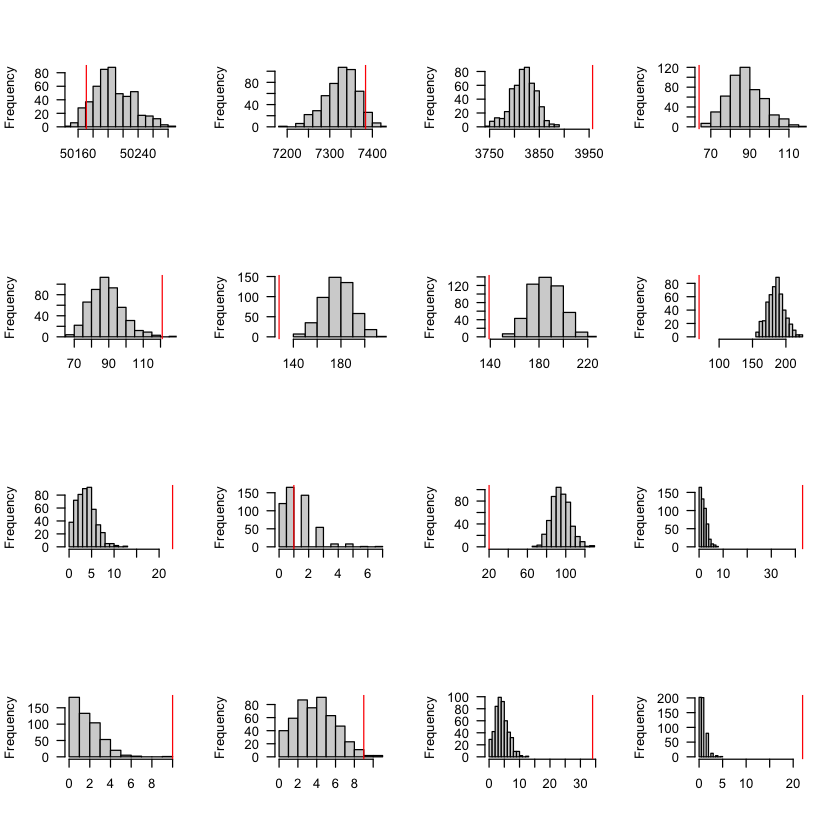

In [116]:
opar = par(mfrow = c(4, 4), bg = 'white')
for (k in 1:16) {
    hist(
        triad_res[, k], 
        xlim = c(min(obs_triad[k], triad_res[, k]), max(obs_triad[k], triad_res[, k])), 
        xlab=dimnames(obs_triad[[2]])[k], main='', 
        las=1
    )
    abline(v = obs_triad[k], col='red')
}

### Doing the above test using the QAP test

In [117]:
q.12 = qaptest(coleman, gcor, g1=1, g2=2)
summary(q.12)


QAP Test Results

Estimated p-values:
	p(f(perm) >= f(d)): 0 
	p(f(perm) <= f(d)): 1 

Test Diagnostics:
	Test Value (f(d)): 0.5312685 
	Replications: 1000 
	Distribution Summary:
		Min:	 -0.03806313 
		1stQ:	 -0.0131289 
		Med:	 -0.0006617818 
		Mean:	 -0.0009859268 
		3rdQ:	 0.007649628 
		Max:	 0.05751809 


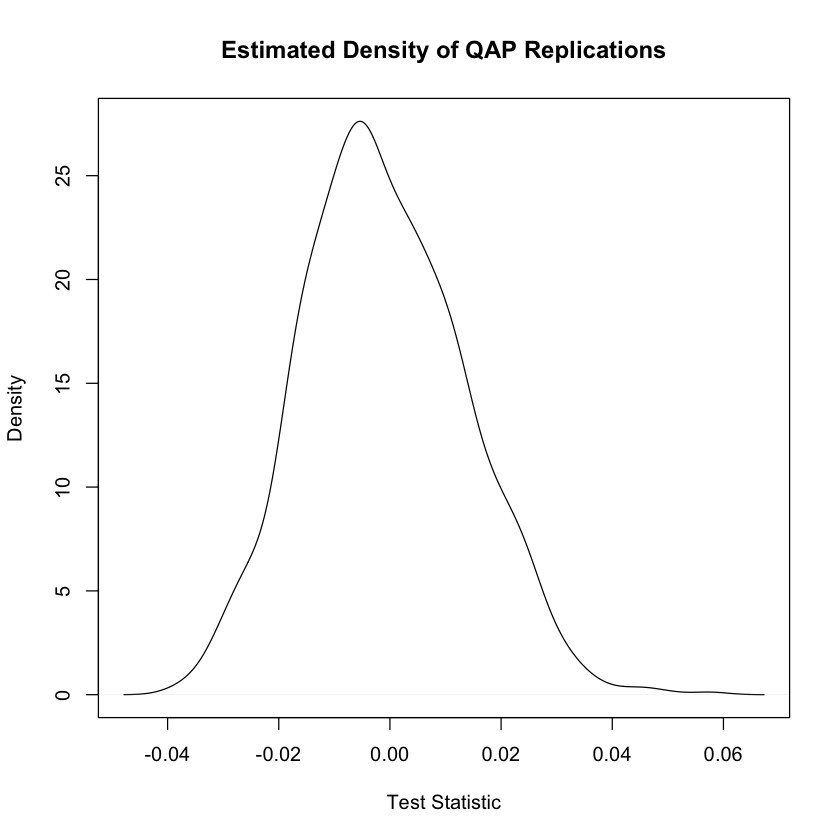

In [118]:
par(bg = 'white')
plot(q.12)